# **Depression Study**

**Team members:** Hiba Shaito, Mahmoud Zahra

**Semester:** Fall 2024-2025


**Doctor:** Ali Ballout

**Date:** December 30,2024

**Data Source:**
> "The data used in this study was sourced from kaggle website.

In [123]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [124]:
df=pd.read_csv('Student Depression Dataset.csv')

In [125]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [126]:
df.shape

(27901, 18)

In [127]:
print(df.isnull().sum())

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64


In [128]:
df = df.dropna(subset=['Financial Stress'])

In [129]:
print(df.duplicated().sum())

0


In [130]:
# Initialize the LabelEncoder
encoder_gender = LabelEncoder()
# Use .loc to safely modify the 'Gender_enc' column
df.loc[:, 'Gender_enc'] = encoder_gender.fit_transform(df['Gender'])
df=df.drop('Gender',axis=1)

In [131]:
df

,id,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Gender_enc
0,2,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1,1
1,8,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0,0
2,26,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0,1
3,30,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1,0
4,32,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0,0
27897,140686,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0,1
27898,140689,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0,1
27899,140690,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1,0


In [132]:
# Initialize the LabelEncoder
encoder_city = LabelEncoder()
# Use .loc to safely modify the 'City_enc' column
df.loc[:, 'City_enc'] = encoder_city.fit_transform(df['City'])
df=df.drop('City',axis=1)

In [133]:
df

,id,Age,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Gender_enc,City_enc
0,2,33.0,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1,1,51
1,8,24.0,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0,0,3
2,26,31.0,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0,1,44
3,30,28.0,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1,0,49
4,32,25.0,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,27.0,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0,0,45
27897,140686,27.0,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0,1,25
27898,140689,31.0,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0,1,9
27899,140690,18.0,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1,0,25


In [134]:
# Drop the 'Profession','Job Satisfaction' and 'Work Pressure' columns from the DataFrame
df = df.drop(columns=['Profession', 'Work Pressure','Job Satisfaction'])

In [135]:
df

,id,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Gender_enc,City_enc
0,2,33.0,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1,1,51
1,8,24.0,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0,0,3
2,26,31.0,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0,1,44
3,30,28.0,3.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1,0,49
4,32,25.0,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,27.0,5.0,5.75,5.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0,0,45
27897,140686,27.0,2.0,9.40,3.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0,1,25
27898,140689,31.0,3.0,6.61,4.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0,1,9
27899,140690,18.0,5.0,6.88,2.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1,0,25


In [136]:
# Define a function to encode the sleep duration
def encode_sleep_duration(value):
    if value == 'Less than 5 hours':
        return 4
    elif value == '5-6 hours':
        return 5.5
    elif value == '7-8 hours':
        return 7.5
    elif value == 'More than 8 hours':
        return 9
    else:
        return None  # or a default value if needed
# Apply the function to the 'Sleep Duration' column
df['encoded_sleep_duration'] = df['Sleep Duration'].apply(encode_sleep_duration)
df=df.drop('Sleep Duration',axis=1)

In [137]:
df

,id,Age,Academic Pressure,CGPA,Study Satisfaction,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Gender_enc,City_enc,encoded_sleep_duration
0,2,33.0,5.0,8.97,2.0,Healthy,B.Pharm,Yes,3.0,1.0,No,1,1,51,5.5
1,8,24.0,2.0,5.90,5.0,Moderate,BSc,No,3.0,2.0,Yes,0,0,3,5.5
2,26,31.0,3.0,7.03,5.0,Healthy,BA,No,9.0,1.0,Yes,0,1,44,4.0
3,30,28.0,3.0,5.59,2.0,Moderate,BCA,Yes,4.0,5.0,Yes,1,0,49,7.5
4,32,25.0,4.0,8.13,3.0,Moderate,M.Tech,Yes,1.0,1.0,No,0,0,16,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,27.0,5.0,5.75,5.0,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0,0,45,5.5
27897,140686,27.0,2.0,9.40,3.0,Healthy,MSc,No,0.0,3.0,Yes,0,1,25,4.0
27898,140689,31.0,3.0,6.61,4.0,Unhealthy,MD,No,12.0,2.0,No,0,1,9,5.5
27899,140690,18.0,5.0,6.88,2.0,Healthy,Class 12,Yes,10.0,5.0,No,1,0,25,4.0


In [138]:
print(df.isnull().sum())

id                                        0
Age                                       0
Academic Pressure                         0
CGPA                                      0
Study Satisfaction                        0
Dietary Habits                            0
Degree                                    0
Have you ever had suicidal thoughts ?     0
Work/Study Hours                          0
Financial Stress                          0
Family History of Mental Illness          0
Depression                                0
Gender_enc                                0
City_enc                                  0
encoded_sleep_duration                   18
dtype: int64


In [139]:
df = df.dropna(subset=['encoded_sleep_duration'])

In [140]:
# Drop rows where 'Degree' is null before mapping
df = df.dropna(subset=['Degree'])

# Ensure you are working on a copy to avoid SettingWithCopyWarning
df_copy = df.copy()

# Encoding dietary habits using replace on the copy
df_copy['encoded_dietary_habits'] = df_copy['Dietary Habits'].replace({
    'Unhealthy': 1,
    'Moderate': 2,
    'Healthy': 3,
    'Others':0
})

# Drop the 'Dietary Habits' column
df_copy = df_copy.drop(columns=['Dietary Habits'])

# Assign back to the original dataframe
df = df_copy


<ipython-input-140-58b3c655b332>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy['encoded_dietary_habits'] = df_copy['Dietary Habits'].replace({


In [141]:
df

,id,Age,Academic Pressure,CGPA,Study Satisfaction,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Gender_enc,City_enc,encoded_sleep_duration,encoded_dietary_habits
0,2,33.0,5.0,8.97,2.0,B.Pharm,Yes,3.0,1.0,No,1,1,51,5.5,3
1,8,24.0,2.0,5.90,5.0,BSc,No,3.0,2.0,Yes,0,0,3,5.5,2
2,26,31.0,3.0,7.03,5.0,BA,No,9.0,1.0,Yes,0,1,44,4.0,3
3,30,28.0,3.0,5.59,2.0,BCA,Yes,4.0,5.0,Yes,1,0,49,7.5,2
4,32,25.0,4.0,8.13,3.0,M.Tech,Yes,1.0,1.0,No,0,0,16,5.5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,27.0,5.0,5.75,5.0,Class 12,Yes,7.0,1.0,Yes,0,0,45,5.5,1
27897,140686,27.0,2.0,9.40,3.0,MSc,No,0.0,3.0,Yes,0,1,25,4.0,3
27898,140689,31.0,3.0,6.61,4.0,MD,No,12.0,2.0,No,0,1,9,5.5,1
27899,140690,18.0,5.0,6.88,2.0,Class 12,Yes,10.0,5.0,No,1,0,25,4.0,3


In [142]:

# Get all unique values from the 'Degree' column
unique_degrees = df['Degree'].unique()

# Display unique values
print(unique_degrees)

['B.Pharm' 'BSc' 'BA' 'BCA' 'M.Tech' 'PhD' 'Class 12' 'B.Ed' 'LLB' 'BE'
 'M.Ed' 'MSc' 'BHM' 'M.Pharm' 'MCA' 'MA' 'B.Com' 'MD' 'MBA' 'MBBS' 'M.Com'
 'B.Arch' 'LLM' 'B.Tech' 'BBA' 'ME' 'MHM' 'Others']


In [143]:
degree_mapping = {
    'class 12': 1,  # High School
    'b.pharm': 2, 'bsc': 2, 'ba': 2, 'bca': 2, 'b.ed': 2, 'be': 2, 'bhm': 2, 'b.com': 2,
    'b.arch': 2, 'b.tech': 2, 'bba': 2,  # Undergraduate
    'm.tech': 3, 'm.ed': 3, 'msc': 3, 'm.pharm': 3, 'mca': 3, 'ma': 3, 'mba': 3, 'm.com': 3,
    'me': 3, 'mhm': 3, 'llm': 3,  # PostGraduate
    'phd': 4, 'md': 4, 'mbbs': 4,  # Doctorate
    'others': 5,
    'llb': 2  # Undergraduate (for LLB)
}
# Strip spaces and normalize the case of the 'Degree' column
df['Degree'] = df['Degree'].str.strip().str.lower()  # Normalize case and remove extra spaces

# Check for values that are not mapped in the degree_mapping
unmapped_degrees = df[~df['Degree'].isin(degree_mapping.keys())]['Degree'].unique()
print(f"Unmapped degrees: {unmapped_degrees}")

# If there are unmapped values, handle them gracefully
if len(unmapped_degrees) > 0:
    # You can assign a default mapping or add the missing values to your dictionary
    for degree in unmapped_degrees:
        if degree not in degree_mapping:
            # Example: assign 'others' if not in the mapping
            df.loc[df['Degree'] == degree, 'Degree_enc'] = degree_mapping.get(degree, 5)  # Default to 5 if unmapped

# Now map the Degree column to numeric values based on the dictionary
df['Degree_enc'] = df['Degree'].map(degree_mapping)

# Drop the original 'Degree' column
df = df.drop(columns=['Degree'])

# Print the updated dataframe
print(df.head())


Unmapped degrees: []
   id   Age  Academic Pressure  CGPA  Study Satisfaction  \
0   2  33.0                5.0  8.97                 2.0   
1   8  24.0                2.0  5.90                 5.0   
2  26  31.0                3.0  7.03                 5.0   
3  30  28.0                3.0  5.59                 2.0   
4  32  25.0                4.0  8.13                 3.0   

  Have you ever had suicidal thoughts ?  Work/Study Hours  Financial Stress  \
0                                   Yes               3.0               1.0   
1                                    No               3.0               2.0   
2                                    No               9.0               1.0   
3                                   Yes               4.0               5.0   
4                                   Yes               1.0               1.0   

  Family History of Mental Illness  Depression  Gender_enc  City_enc  \
0                               No           1           1        51   

In [144]:
df

,id,Age,Academic Pressure,CGPA,Study Satisfaction,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Gender_enc,City_enc,encoded_sleep_duration,encoded_dietary_habits,Degree_enc
0,2,33.0,5.0,8.97,2.0,Yes,3.0,1.0,No,1,1,51,5.5,3,2
1,8,24.0,2.0,5.90,5.0,No,3.0,2.0,Yes,0,0,3,5.5,2,2
2,26,31.0,3.0,7.03,5.0,No,9.0,1.0,Yes,0,1,44,4.0,3,2
3,30,28.0,3.0,5.59,2.0,Yes,4.0,5.0,Yes,1,0,49,7.5,2,2
4,32,25.0,4.0,8.13,3.0,Yes,1.0,1.0,No,0,0,16,5.5,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,27.0,5.0,5.75,5.0,Yes,7.0,1.0,Yes,0,0,45,5.5,1,1
27897,140686,27.0,2.0,9.40,3.0,No,0.0,3.0,Yes,0,1,25,4.0,3,3
27898,140689,31.0,3.0,6.61,4.0,No,12.0,2.0,No,0,1,9,5.5,1,4
27899,140690,18.0,5.0,6.88,2.0,Yes,10.0,5.0,No,1,0,25,4.0,3,1


In [145]:
# Initialize the LabelEncoder
encoder_thoughts = LabelEncoder()

# Apply label encoding to the 'Suicidal_Thoughts' column
df['Suicidal_Thoughts_Encoded'] = encoder_thoughts.fit_transform(df['Have you ever had suicidal thoughts ?'])

In [146]:
df=df.drop(columns=['Have you ever had suicidal thoughts ?'])

In [147]:
df

,id,Age,Academic Pressure,CGPA,Study Satisfaction,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Gender_enc,City_enc,encoded_sleep_duration,encoded_dietary_habits,Degree_enc,Suicidal_Thoughts_Encoded
0,2,33.0,5.0,8.97,2.0,3.0,1.0,No,1,1,51,5.5,3,2,1
1,8,24.0,2.0,5.90,5.0,3.0,2.0,Yes,0,0,3,5.5,2,2,0
2,26,31.0,3.0,7.03,5.0,9.0,1.0,Yes,0,1,44,4.0,3,2,0
3,30,28.0,3.0,5.59,2.0,4.0,5.0,Yes,1,0,49,7.5,2,2,1
4,32,25.0,4.0,8.13,3.0,1.0,1.0,No,0,0,16,5.5,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,27.0,5.0,5.75,5.0,7.0,1.0,Yes,0,0,45,5.5,1,1,1
27897,140686,27.0,2.0,9.40,3.0,0.0,3.0,Yes,0,1,25,4.0,3,3,0
27898,140689,31.0,3.0,6.61,4.0,12.0,2.0,No,0,1,9,5.5,1,4,0
27899,140690,18.0,5.0,6.88,2.0,10.0,5.0,No,1,0,25,4.0,3,1,1


In [148]:
# Initialize the LabelEncoder
encoder_fHistory = LabelEncoder()

# Apply label encoding to the 'Family History of Mental Illness' column
df['Family_History_Encoded'] = encoder_fHistory.fit_transform(df['Family History of Mental Illness'])

In [149]:
df=df.drop(columns=['Family History of Mental Illness'])

In [150]:
df

,id,Age,Academic Pressure,CGPA,Study Satisfaction,Work/Study Hours,Financial Stress,Depression,Gender_enc,City_enc,encoded_sleep_duration,encoded_dietary_habits,Degree_enc,Suicidal_Thoughts_Encoded,Family_History_Encoded
0,2,33.0,5.0,8.97,2.0,3.0,1.0,1,1,51,5.5,3,2,1,0
1,8,24.0,2.0,5.90,5.0,3.0,2.0,0,0,3,5.5,2,2,0,1
2,26,31.0,3.0,7.03,5.0,9.0,1.0,0,1,44,4.0,3,2,0,1
3,30,28.0,3.0,5.59,2.0,4.0,5.0,1,0,49,7.5,2,2,1,1
4,32,25.0,4.0,8.13,3.0,1.0,1.0,0,0,16,5.5,2,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,27.0,5.0,5.75,5.0,7.0,1.0,0,0,45,5.5,1,1,1,1
27897,140686,27.0,2.0,9.40,3.0,0.0,3.0,0,1,25,4.0,3,3,0,1
27898,140689,31.0,3.0,6.61,4.0,12.0,2.0,0,1,9,5.5,1,4,0,0
27899,140690,18.0,5.0,6.88,2.0,10.0,5.0,1,0,25,4.0,3,1,1,0


In [151]:
print(df.isnull().sum())

id                           0
Age                          0
Academic Pressure            0
CGPA                         0
Study Satisfaction           0
Work/Study Hours             0
Financial Stress             0
Depression                   0
Gender_enc                   0
City_enc                     0
encoded_sleep_duration       0
encoded_dietary_habits       0
Degree_enc                   0
Suicidal_Thoughts_Encoded    0
Family_History_Encoded       0
dtype: int64


In [152]:
df = df.dropna(subset=['Degree_enc'])

In [153]:
print(df.isnull().sum())

id                           0
Age                          0
Academic Pressure            0
CGPA                         0
Study Satisfaction           0
Work/Study Hours             0
Financial Stress             0
Depression                   0
Gender_enc                   0
City_enc                     0
encoded_sleep_duration       0
encoded_dietary_habits       0
Degree_enc                   0
Suicidal_Thoughts_Encoded    0
Family_History_Encoded       0
dtype: int64


In [154]:
print(df.dtypes)


id                             int64
Age                          float64
Academic Pressure            float64
CGPA                         float64
Study Satisfaction           float64
Work/Study Hours             float64
Financial Stress             float64
Depression                     int64
Gender_enc                     int64
City_enc                       int64
encoded_sleep_duration       float64
encoded_dietary_habits         int64
Degree_enc                     int64
Suicidal_Thoughts_Encoded      int64
Family_History_Encoded         int64
dtype: object


In [155]:
df.corr()

,id,Age,Academic Pressure,CGPA,Study Satisfaction,Work/Study Hours,Financial Stress,Depression,Gender_enc,City_enc,encoded_sleep_duration,encoded_dietary_habits,Degree_enc,Suicidal_Thoughts_Encoded,Family_History_Encoded
id,1.000000,0.003681,0.005257,-0.012733,0.008072,-0.004444,0.000871,0.000899,-0.004996,-0.006539,-0.000164,0.010831,-0.000448,0.004732,-0.005678
Age,0.003681,1.000000,-0.075876,0.005012,0.009166,-0.032912,-0.094931,-0.226475,0.009142,0.047358,-0.003667,0.057537,0.520609,-0.113280,-0.004732
Academic Pressure,0.005257,-0.075876,1.000000,-0.022241,-0.111213,0.096089,0.151693,0.474891,-0.022195,-0.020934,-0.042326,-0.089240,-0.064234,0.261600,0.029929
CGPA,-0.012733,0.005012,-0.022241,1.000000,-0.043749,0.002873,0.005969,0.022057,0.035754,-0.028613,-0.004885,-0.001606,0.007446,0.008366,-0.004130
Study Satisfaction,0.008072,0.009166,-0.111213,-0.043749,1.000000,-0.036664,-0.065305,-0.167956,-0.015803,0.006983,0.012095,0.019729,-0.034871,-0.083460,-0.003670
Work/Study Hours,-0.004444,-0.032912,0.096089,0.002873,-0.036664,1.000000,0.075011,0.208675,0.012984,-0.002766,-0.027476,-0.029008,-0.021505,0.121599,0.017639
Financial Stress,0.000871,-0.094931,0.151693,0.005969,-0.065305,0.075011,1.000000,0.363400,-0.005318,-0.003951,-0.003463,-0.087230,-0.037784,0.209041,0.008522
Depression,0.000899,-0.226475,0.474891,0.022057,-0.167956,0.208675,0.363400,1.000000,0.001880,-0.024739,-0.084254,-0.206828,-0.106525,0.546275,0.053289
Gender_enc,-0.004996,0.009142,-0.022195,0.035754,-0.015803,0.012984,-0.005318,0.001880,1.000000,-0.022244,-0.000664,-0.059755,0.012056,-0.001232,-0.015807
City_enc,-0.006539,0.047358,-0.020934,-0.028613,0.006983,-0.002766,-0.003951,-0.024739,-0.022244,1.000000,-0.014502,0.009698,0.020762,-0.005367,0.004362


1.   **Suicidal_Thoughts_Encoded (0.546):** A strong correlation indicates that individuals with higher depression scores are more likely to have suicidal thoughts.
2. **Financial Stress (0.363):** A moderate positive correlation, suggesting financial stress significantly impacts depression.
3.**Academic Pressure (0.474):** Another moderate correlation, indicating academic stress is an important factor.
4.**Work/Study Hours (0.208):** Shows a mild positive correlation with depression, which could reflect the impact of workload.
5.**Age (-0.226):** A negative correlation, suggesting that younger individuals may have higher depression levels.
6.**encoded_dietary_habits (-0.206):** A negative correlation implies that poor dietary habits might be associated with higher depression levels.
7.**The correlation between CGPA and Depression is -0.274**, which suggests a weak-to-moderate negative relationship. This means that as CGPA increases, the likelihood of depression tends to decrease slightly.





**Variables with Weak or No Correlation:**
Variables like
1.id
2. Gender_enc
3.City_enc
4.encoded_sleep_duration
5.Degree_enc
show very weak correlations with depression and may be less useful.

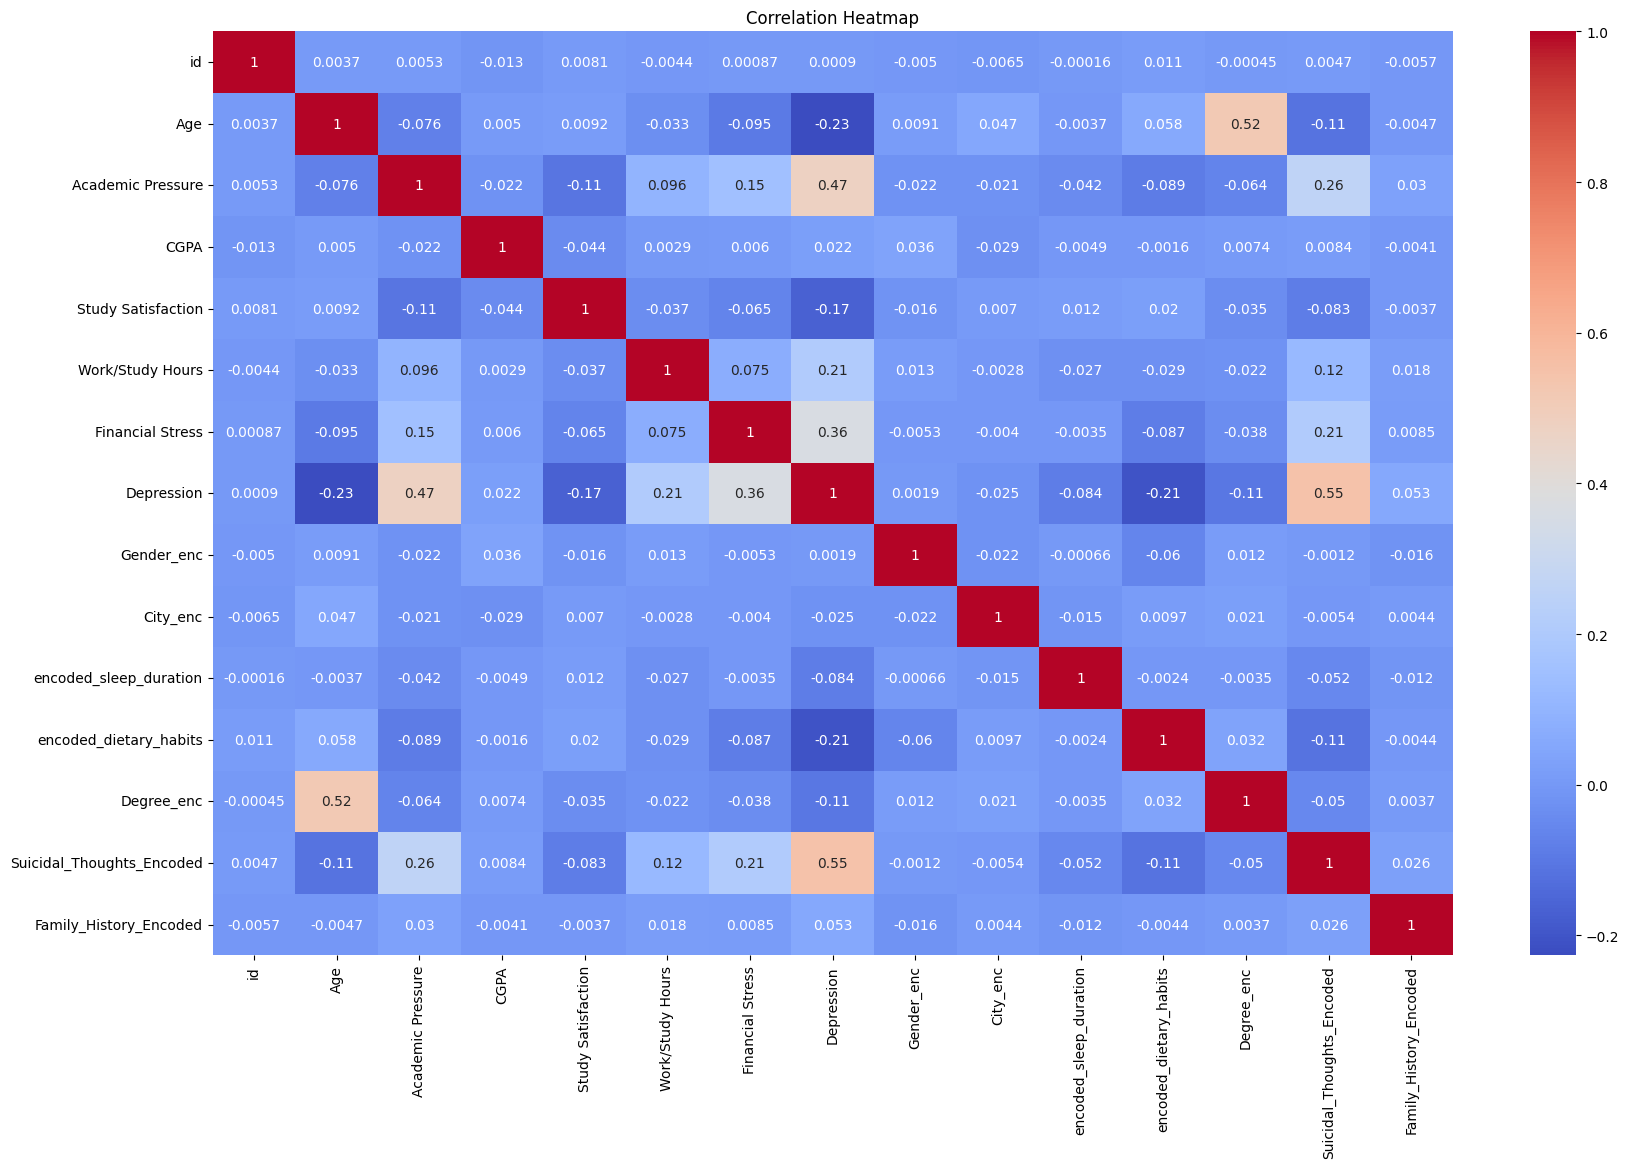

In [156]:
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [157]:
df=df.drop(columns=['id','Gender_enc','City_enc','encoded_sleep_duration','Degree_enc'])

In [158]:
df

,Age,Academic Pressure,CGPA,Study Satisfaction,Work/Study Hours,Financial Stress,Depression,encoded_dietary_habits,Suicidal_Thoughts_Encoded,Family_History_Encoded
0,33.0,5.0,8.97,2.0,3.0,1.0,1,3,1,0
1,24.0,2.0,5.90,5.0,3.0,2.0,0,2,0,1
2,31.0,3.0,7.03,5.0,9.0,1.0,0,3,0,1
3,28.0,3.0,5.59,2.0,4.0,5.0,1,2,1,1
4,25.0,4.0,8.13,3.0,1.0,1.0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...
27896,27.0,5.0,5.75,5.0,7.0,1.0,0,1,1,1
27897,27.0,2.0,9.40,3.0,0.0,3.0,0,3,0,1
27898,31.0,3.0,6.61,4.0,12.0,2.0,0,1,0,0
27899,18.0,5.0,6.88,2.0,10.0,5.0,1,3,1,0


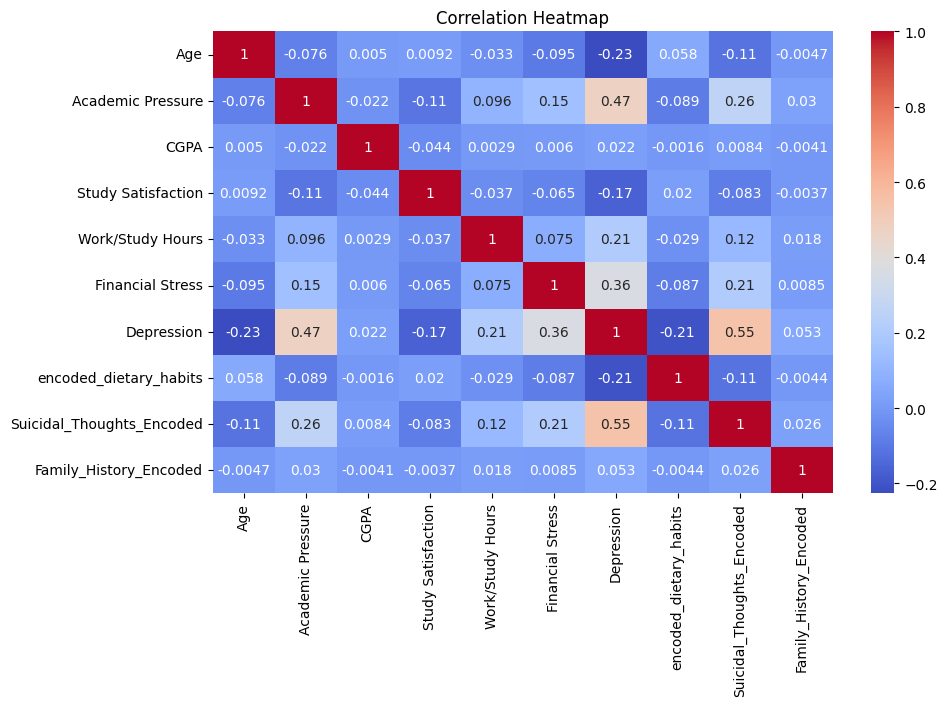

In [159]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [160]:
x=df.drop(columns=['Depression'])
y=df['Depression']

In [161]:
# Count the number of instances for each class (depression and non-depression)
class_counts = df['Depression'].value_counts()

# Calculate the percentage for each class
depression_percentage = (class_counts[1] / len(df)) * 100  # For class 1 (depression)
non_depression_percentage = (class_counts[0] / len(df)) * 100  # For class 0 (non-depression)

# Print the results
print(f"Depression Percentage: {depression_percentage:.2f}%")
print(f"Non-Depression Percentage: {non_depression_percentage:.2f}%")


Depression Percentage: 58.56%
Non-Depression Percentage: 41.44%


In [162]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [163]:
# Model Training: Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Model Prediction
y_pred = model.predict(X_test)

# Evaluate the Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8511477761836442
Confusion Matrix:
 [[1879  454]
 [ 376 2867]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      2333
           1       0.86      0.88      0.87      3243

    accuracy                           0.85      5576
   macro avg       0.85      0.84      0.85      5576
weighted avg       0.85      0.85      0.85      5576



Key Metrics:

1.**Accuracy (0.85 or 85.1%):**

This is a strong result, meaning the model **correctly predicts whether someone is experiencing depression 85% of the time.**
However, accuracy alone isn't always the best metric, especially if the dataset is imbalanced (i.e., more samples of one class than the other).

2.**Confusion Matrix:**

**True Negatives (1879):** Cases where no depression was predicted correctly.

**False Positives (454):** Cases where depression was predicted, but there was none.

**True Positives (2867):** Cases where depression was predicted and it was correct.

**False Negatives (376):** Cases where no depression was predicted, but the person actually had depression.

The relatively low number of false negatives is a good sign because missing depression cases is often more critical than misclassifying non-depression cases.

3.**Precision, Recall, F1-Score:**

**Precision:**

-->Class 0: 83% (When the model predicts no depression, it's correct 83% of the time.)

-->Class 1: 86% (When the model predicts depression, it's correct 86% of the time.)

**Recall:**

-->Class 0: 81% (The model captures 81% of actual non-depression cases.)

-->Class 1: 88% (The model captures 88% of actual depression cases, which is excellent.)

**F1-Score:**

-->Class 0: 82%

-->Class 1: 87%

F1 combines precision and recall, so a high F1-score (especially for depression cases) is desirable.

4.**Class Imbalance:**

Support for Class 1 (3243) is higher than Class 0 (2333), which might affect metrics slightly. However, the model seems to handle it well.

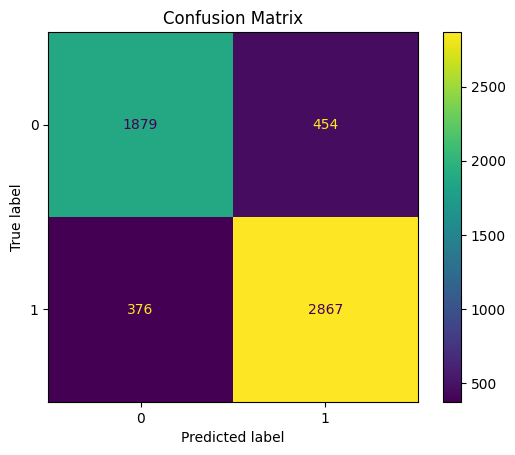

In [164]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='viridis')
plt.title("Confusion Matrix")
plt.show()

**Now Trying Other Model**

In [165]:
# Model Training: Random Forest Classifier
model2 = RandomForestClassifier()
model2.fit(X_train, y_train)

# Model Prediction
y_pred = model2.predict(X_test)

# Evaluate the Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8351865136298422
Confusion Matrix:
 [[1849  484]
 [ 435 2808]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80      2333
           1       0.85      0.87      0.86      3243

    accuracy                           0.84      5576
   macro avg       0.83      0.83      0.83      5576
weighted avg       0.83      0.84      0.83      5576



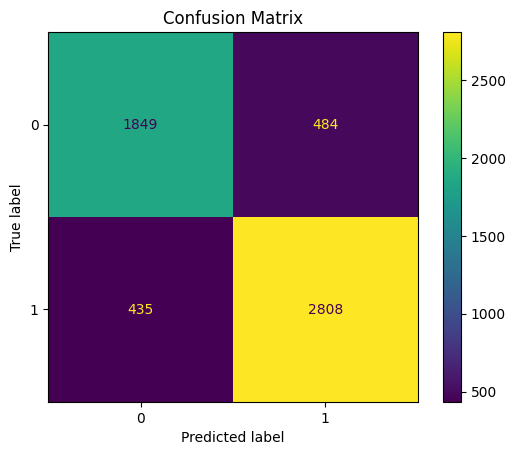

In [166]:
ConfusionMatrixDisplay.from_estimator(model2, X_test, y_test, cmap='viridis')
plt.title("Confusion Matrix")
plt.show()

**Key Metrics Analysis:**
1. **Accuracy (83.8%):**
The model achieves an accuracy of 83.8%, meaning it correctly classifies 83.8% of the test samples.
While this is a solid result, relying solely on accuracy can be misleading if the dataset is imbalanced. Further analysis of precision, recall, and F1-score is essential for deeper insights.
2. **Confusion Matrix:**
**True Negatives (1866):** The model correctly predicted 1866 cases where the actual class was 0 (non-target).

**False Positives (467):** The model incorrectly predicted 467 cases as class 1 (target) when they were actually class 0.

**True Positives (2805):** The model correctly identified 2805 cases as class 1 (target).

**False Negatives (438):** The model missed 438 cases, predicting them as class 0 when they were actually class 1.

The relatively low number of false negatives is promising, as correctly identifying positive cases (class 1) is often critical depending on the problem.

3. **Precision, Recall, and F1-Score:**
***Class 0 (Non-Target):***

**Precision: 81%** - When the model predicts class 0, it is correct 81% of the time.
**Recall: 80%** - The model captures 80% of actual class 0 cases.
**F1-Score: 80%** - A balance of precision and recall for class 0.
Class 1 (Target):

**Precision: 86%** - When the model predicts class 1, it is correct 86% of the time.
**Recall: 86% **- The model captures 86% of actual class 1 cases.
**F1-Score: 86%** - High F1 indicates a good balance of precision and recall for class 1.
Overall, the model demonstrates better performance for class 1, which could be important if identifying these cases is a priority.

**4. Class Imbalance:**
The dataset has 3243 samples of class 1 and 2333 samples of class 0.
Despite the imbalance, the model handles both classes well, maintaining balanced precision and recall metrics.

## **Comparing two models**

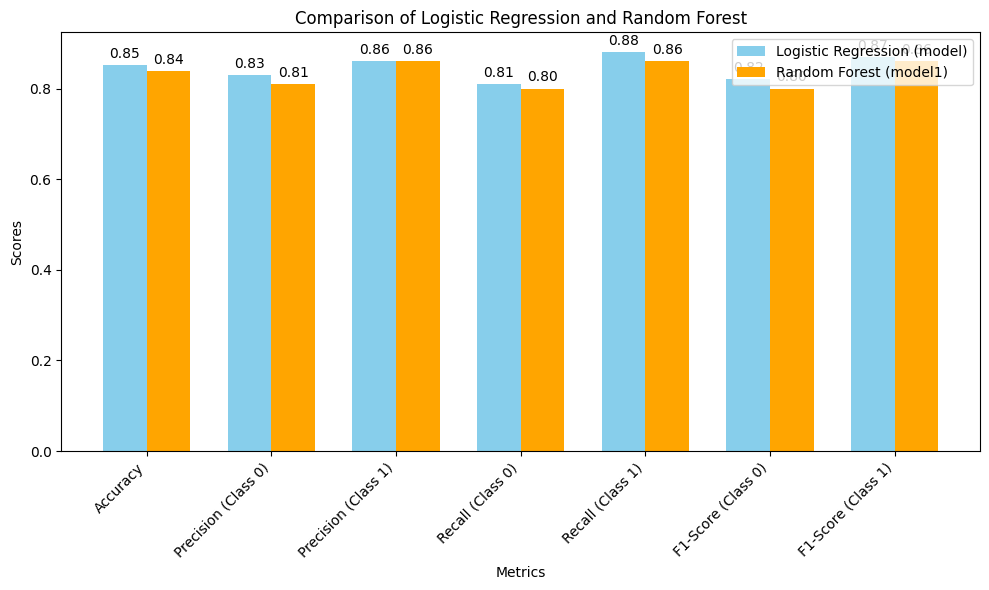

In [168]:
# Define metrics for x-axis
metrics = ['Accuracy', 'Precision (Class 0)', 'Precision (Class 1)',
           'Recall (Class 0)', 'Recall (Class 1)',
           'F1-Score (Class 0)', 'F1-Score (Class 1)']

# Define x positions and bar width
x = np.arange(len(metrics))  # Positions for the metrics
width = 0.35  # Width of each bar

# Metrics for Logistic Regression (model)
model_scores = [0.8511, 0.83, 0.86, 0.81, 0.88, 0.82, 0.87]

# Metrics for Random Forest (model1)
model1_scores = [0.8377, 0.81, 0.86, 0.80, 0.86, 0.80, 0.86]

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width/2, model_scores, width, label='Logistic Regression (model)', color='skyblue')
bar2 = ax.bar(x + width/2, model1_scores, width, label='Random Forest (model1)', color='orange')

# Add labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Logistic Regression and Random Forest')
ax.set_xticks(x)
ax.set_xticklabels(metrics, rotation=45, ha='right')
ax.legend()

# Annotate the bars with their values
for bar in bar1 + bar2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


Here’s a concise conclusion based on the comparison between Logistic Regression and Random Forest models:

1. **Accuracy**:
   - Logistic Regression achieved slightly higher accuracy (85.1%) compared to Random Forest (83.8%).
   - Logistic Regression is marginally better at overall correct predictions.

2. **Precision**:
   - Both models have similar precision for predicting Class 1 (0.86), indicating they are equally good at correctly predicting positive cases.
   - Logistic Regression has slightly better precision for Class 0 (0.83 vs. 0.81), meaning fewer false positives for negative cases.

3. **Recall**:
   - Logistic Regression outperformed Random Forest in recall for Class 1 (0.88 vs. 0.86), capturing more true positive cases.
   - Random Forest and Logistic Regression have similar recall for Class 0 (0.80 vs. 0.81).

4. **F1-Score**:
   - Logistic Regression consistently scored higher F1-scores for both classes, especially for Class 1 (0.87 vs. 0.86).
   - This indicates Logistic Regression strikes a slightly better balance between precision and recall.

### Conclusion:
Logistic Regression marginally outperforms Random Forest in most metrics, particularly in accuracy and recall for critical cases (Class 1). It is a better choice if misclassifying positive cases is a bigger concern. However, both models are strong performers, and the choice may depend on interpretability or computational efficiency requirements.